In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import zipfile

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
data = zipfile.ZipFile('/content/symptomData.zip')
data.extractall()
data.close()

In [ ]:
import pandas as pd

In [ ]:
data_pd = pd.read_csv('/content/Symptom2Disease.csv')
data_pd.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
data_pd = data_pd.drop('Unnamed: 0',axis=1)
data_pd

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
data_pd['label']

0       Psoriasis
1       Psoriasis
2       Psoriasis
3       Psoriasis
4       Psoriasis
          ...    
1195     diabetes
1196     diabetes
1197     diabetes
1198     diabetes
1199     diabetes
Name: label, Length: 1200, dtype: object

In [ ]:
classes=data_pd['label'].unique()
classes

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [ ]:
data_pd['text'][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
data_pd['label']=label_encoder.fit_transform(data_pd['label'])


In [ ]:
c=label_encoder.classes_
c

array(['Acne', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis',
       'Chicken pox', 'Common Cold', 'Dengue', 'Dimorphic Hemorrhoids',
       'Fungal infection', 'Hypertension', 'Impetigo', 'Jaundice',
       'Malaria', 'Migraine', 'Pneumonia', 'Psoriasis', 'Typhoid',
       'Varicose Veins', 'allergy', 'diabetes', 'drug reaction',
       'gastroesophageal reflux disease', 'peptic ulcer disease',
       'urinary tract infection'], dtype=object)

In [ ]:
v=data_pd['label'].unique()
v

array([15, 17, 16,  4, 10,  6,  8,  5, 14,  7,  1,  0,  2,  9, 13,  3, 11,
       12, 23, 18, 21, 20, 22, 19])

In [ ]:
x_data = data_pd.drop('label',axis=1)
y_data = data_pd['label']

In [ ]:
x_data

,text
0,I have been experiencing a skin rash on my arm...
1,"My skin has been peeling, especially on my kne..."
2,I have been experiencing joint pain in my fing...
3,"There is a silver like dusting on my skin, esp..."
4,"My nails have small dents or pits in them, and..."
...,...
1195,I'm shaking and trembling all over. I've lost ...
1196,"Particularly in the crevices of my skin, I hav..."
1197,I regularly experience these intense urges and...
1198,"I have trouble breathing, especially outside. ..."


43 [28, 23, 28, 32, 27, 20, 26, 28, 28, 26, 26, 36, 33, 26, 32, 28, 30, 40, 33, 28, 32, 33, 22, 25, 26, 24, 28, 39, 33, 31, 30, 34, 26, 25, 33, 29, 33, 33, 31, 37, 36, 34, 37, 26, 25, 25, 33, 28, 34, 30, 44, 33, 29, 33, 30, 29, 31, 29, 29, 27, 23, 36, 27, 32, 32, 18, 20, 23, 21, 26, 28, 26, 23, 30, 24, 28, 33, 28, 35, 30, 30, 33, 26, 27, 23, 32, 27, 30, 23, 24, 30, 24, 26, 32, 30, 27, 26, 25, 35, 30, 37, 24, 27, 25, 39, 34, 23, 22, 26, 22, 29, 30, 26, 34, 27, 29, 29, 34, 26, 26, 21, 23, 26, 27, 28, 33, 30, 36, 21, 23, 23, 26, 30, 34, 35, 25, 26, 32, 29, 31, 19, 35, 36, 31, 29, 43, 38, 31, 30, 44, 23, 27, 31, 15, 27, 18, 32, 26, 27, 18, 27, 38, 30, 27, 27, 33, 22, 31, 33, 25, 18, 30, 30, 30, 23, 30, 32, 25, 30, 27, 22, 20, 26, 22, 32, 30, 30, 33, 28, 31, 39, 35, 38, 23, 31, 32, 36, 34, 43, 28, 28, 31, 26, 31, 32, 26, 31, 30, 34, 26, 33, 35, 32, 35, 29, 22, 34, 34, 30, 30, 24, 32, 42, 33, 32, 34, 39, 28, 28, 36, 43, 31, 25, 24, 34, 29, 31, 36, 29, 22, 32, 36, 32, 32, 43, 29, 33, 29, 34, 

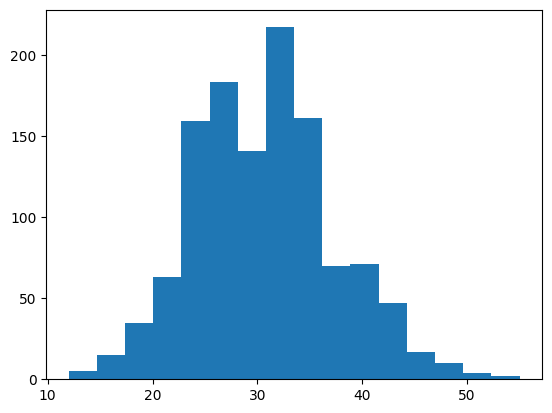

In [ ]:
len_text = [len(txt.split()) for txt in x_data['text']]
max=int(np.percentile(len_text,95))
print(max,len_text)
plt.hist(len_text,bins=16)
plt.show()


In [ ]:
x_data['text'][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(x_data['text'])
word_train = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(x_data['text'])
pad_seq  = pad_sequences(sequence,maxlen=max,padding='post',truncating='post')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pad_seq,y_data,test_size=0.2,shuffle=True,random_state=42)
len(x_train),len(y_train)

(960, 960)

In [ ]:
word_train_num = len(word_train)
word_train_num

1576

In [ ]:
x_test

array([[  4,   7, 675, ...,   4,  72,   7],
       [  4,   7,   5, ...,   5,  46,   2],
       [  8,  15,  36, ...,   2, 240,   2],
       ...,
       [  8,   6,  30, ...,  91,   7, 868],
       [  3, 807,  12, ..., 336,   2, 199],
       [  8,  36, 154, ...,   5,  17,   2]], dtype=int32)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(word_train_num,128,mask_zero=True,name='Embedding_layer')

In [ ]:
input = tf.keras.layers.Input(shape=[None],name='input_layer')
embedding = embedding_layer(input)
x = tf.keras.layers.LSTM(128)(embedding)
x = tf.keras.layers.Dense(64,activation='relu')(x)
output = tf.keras.layers.Dense(len(classes),activation='softmax')(x)
model = tf.keras.Model(input,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, None)]            0         
                                                                 
 Embedding_layer (Embedding  (None, None, 128)         201728    
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
Total params: 343128 (1.31 MB)
Trainable params: 343128 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________

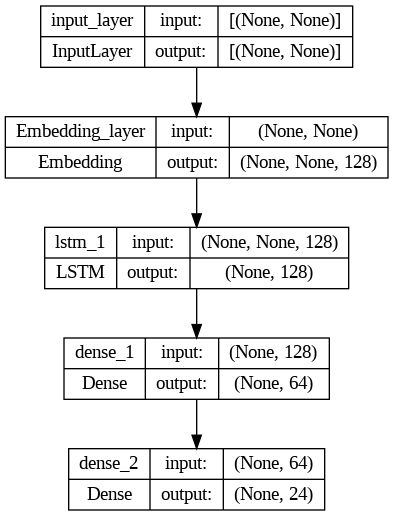

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
30/30 [==============================] - 8s 125ms/step - loss: 3.0044 - accuracy: 0.2719 - val_loss: 2.6144 - val_accuracy: 0.1958
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 1.7684 - accuracy: 0.4531 - val_loss: 1.6396 - val_accuracy: 0.5500
Epoch 3/10
30/30 [==============================] - 1s 22ms/step - loss: 0.7975 - accuracy: 0.8052 - val_loss: 1.2371 - val_accuracy: 0.6875
Epoch 4/10
30/30 [==============================] - 1s 26ms/step - loss: 0.3160 - accuracy: 0.9281 - val_loss: 1.1764 - val_accuracy: 0.7417
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1318 - accuracy: 0.9854 - val_loss: 1.0689 - val_accuracy: 0.7667
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.0669 - accuracy: 0.9927 - val_loss: 1.1119 - val_accuracy: 0.7792
Epoch 7/10
30/30 [==============================] - 0s 12ms/step - loss: 0.0460 - accuracy: 0.9937 - val_loss: 1.1687 - val_accuracy: 0.7833
Epoch 8/10
3

In [ ]:
eval=model.evaluate(x_test,y_test)
eval

8/8 [==============================] - 0s 4ms/step - loss: 1.2498 - accuracy: 0.7958


[1.2498250007629395, 0.7958333492279053]

In [ ]:
model.save('symptom.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_load = tf.keras.models.load_model('/content/symptom.h5')

In [ ]:
model_load.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, None)]            0         
                                                                 
 Embedding_layer (Embedding  (None, None, 128)         201728    
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
Total params: 343128 (1.31 MB)
Trainable params: 343128 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
t=x_test[0]
t

array([   4,    7,  675,  136,  191,   40,  585,   89, 1571,   23,  160,
          2,  925,    4,   72,    7], dtype=int32)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading


NameError: name 'tokenizer' is not defined

In [ ]:
import pickle

In [ ]:
with open('/content/tokenizer.pickle', 'rb') as handle:
    tokenizer_model = pickle.load(handle)

In [ ]:
tokenizer_model.word_index

{'<OOV>': 1,
 'and': 2,
 'my': 3,
 'i': 4,
 'a': 5,
 'been': 6,
 'have': 7,
 "i've": 8,
 'of': 9,
 'to': 10,
 'the': 11,
 'is': 12,
 'in': 13,
 'has': 14,
 'also': 15,
 'skin': 16,
 'lot': 17,
 'are': 18,
 'really': 19,
 'pain': 20,
 'it': 21,
 'on': 22,
 "i'm": 23,
 'with': 24,
 'fever': 25,
 'that': 26,
 'me': 27,
 'feel': 28,
 'feeling': 29,
 'experiencing': 30,
 'high': 31,
 'neck': 32,
 'having': 33,
 'there': 34,
 'all': 35,
 'had': 36,
 'for': 37,
 'am': 38,
 'cough': 39,
 'when': 40,
 'chest': 41,
 'get': 42,
 "it's": 43,
 'as': 44,
 'quite': 45,
 'headache': 46,
 'up': 47,
 'throat': 48,
 'rash': 49,
 'hurts': 50,
 'red': 51,
 'severe': 52,
 'body': 53,
 'some': 54,
 'itching': 55,
 'or': 56,
 'this': 57,
 'over': 58,
 'painful': 59,
 'weak': 60,
 'back': 61,
 'chills': 62,
 'very': 63,
 'from': 64,
 'difficult': 65,
 'stomach': 66,
 'like': 67,
 'discomfort': 68,
 'lost': 69,
 'nausea': 70,
 'time': 71,
 'frequently': 72,
 'coughing': 73,
 'uncomfortable': 74,
 'muscles': 75,

In [ ]:
v=['I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.']
x=tokenizer_model.texts_to_sequences(v)
p =pad_sequences(x,maxlen=16,padding='post',truncating='post')
p

array([[  4,   7,   6,  30,   5,  16,  49,  22,   3,  93,  80,   2, 809,
         37,  11, 285]], dtype=int32)

In [ ]:
def input_tokenizer(txt,tok):
  val=tok.texts_to_sequences(txt)
  p =pad_sequences(val,maxlen=16,padding='post',truncating='post')
  return p

In [ ]:
output=model_load.predict(p)
pred = np.argmax(output,axis=1)
pred

1/1 [==============================] - 2s 2s/step


array([15])

In [ ]:
def prediction_symptom(txt,classes,model):
  output=model.predict(txt)
  pred = np.argmax(output,axis=1)
  output_pred=classes[pred[0]]
  return output_pred
